In [1]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import pylab as pl
from sklearn.metrics import confusion_matrix








In [2]:
# Importing the dataset

dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)



In [3]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jahnavimettu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [5]:
#NB Code

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Predicting the Train set results
y_pred1 = classifier.predict(X_train)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_train, y_pred1)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

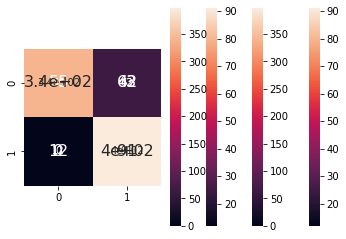

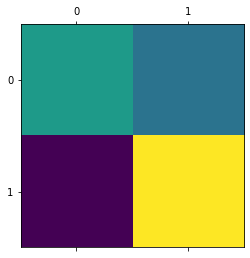

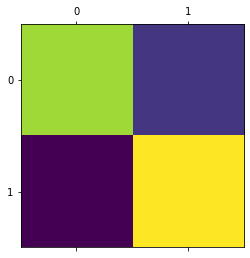

In [6]:
plt.imshow(cm, cmap='binary')

plt.imshow(cm1, cmap='binary')

sn.heatmap(cm, annot=True)

sn.heatmap(cm1, annot=True)

sn.heatmap(cm, annot=True,annot_kws={"size": 16})

sn.heatmap(cm1, annot=True,annot_kws={"size": 16})

pl.matshow(cm)

pl.matshow(cm1)
